In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/players_22.csv/players_22.csv")
features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']
data = data.dropna(subset = features)
dataset = data[features].copy()
dataset

C:\Users\Trung\AppData\Local\Temp\ipykernel_23216\4115352224.py:5: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/players_22.csv/players_22.csv")


,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [5]:
dataset = ((dataset - dataset.min()) / dataset.max()) * 9 + 1
dataset


,overall,potential,value_eur,wage_eur,age
0,5.451613,5.168421,4.618139,9.215714,4.767442
1,5.354839,5.073684,6.543397,7.930000,4.348837
2,5.258065,4.978947,3.087211,7.930000,5.186047
3,5.258065,4.978947,6.984119,7.930000,3.720930
4,5.258065,4.978947,6.821747,9.987143,3.930233
...,...,...,...,...,...
19234,1.000000,1.284211,1.002830,1.012857,2.255814
19235,1.000000,1.947368,1.004686,1.000000,1.627907
19236,1.000000,1.568421,1.004222,1.000000,2.046512
19237,1.000000,2.042105,1.004686,1.000000,1.627907


In [6]:
print(dataset.shape)

(19165, 5)


In [7]:
def init_centroids(dataset, clusters) :
    centroids = []
    for _ in range(clusters) :
        centroid = dataset.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)
centroids = init_centroids(dataset, 5)
centroids
    

C:\Users\Trung\AppData\Local\Temp\ipykernel_23216\4167790107.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = dataset.apply(lambda x: float(x.sample()))


,0,1,2,3,4
overall,3.129032,3.129032,1.870968,2.354839,1.677419
potential,3.084211,2.989474,4.126316,2.894737,2.705263
value_eur,1.059892,1.175871,1.014660,1.106284,1.011180
wage_eur,1.064286,1.000000,1.064286,1.038571,1.000000
age,2.046512,2.465116,4.348837,2.674419,3.093023


In [8]:
def assign_labels(dataset, centroids) :
    distances = centroids.apply(lambda x : np.sqrt(((dataset - x)**2).sum(axis = 1)))
    return distances.idxmin(axis = 1)
labels = assign_labels(dataset, centroids)
labels.value_counts()

3    6232
1    5587
0    3691
4    2030
2    1625
Name: count, dtype: int64

In [9]:
labels

0        2
1        1
2        2
3        1
4        1
        ..
19234    4
19235    4
19236    4
19237    4
19238    4
Length: 19165, dtype: int64

In [10]:
def new_centroids(dataset, labels) :
    centroids = dataset.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T
    return centroids
new_centroid = new_centroids(dataset, labels)
new_centroid

,0,1,2,3,4
overall,2.754997,3.390534,3.267328,2.330208,2.092615
potential,3.628590,3.383071,3.028340,2.769482,2.168427
value_eur,1.124530,1.232227,1.084118,1.027797,1.012817
wage_eur,1.150408,1.383290,1.248038,1.041320,1.028987
age,1.850723,3.156443,4.781415,2.503376,3.366335


In [11]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

def plot_clusters(dataset, centroids, labels, iteration) :
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(dataset)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait = True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x = data_2d[:, 0], y = data_2d[:, 1], c = labels)
    plt.scatter(x = centroids_2d[:, 0], y = centroids_2d[:, 1])
    plt.show()


In [12]:
def has_converged(centroids, new_centroids) :
    return centroids.equals(new_centroids)

In [17]:
def k_means(dataset) :
    centroids = init_centroids(dataset, 5)
    max_iteration = 50
    iteration = 0
    while iteration < max_iteration :
        old_centroids = centroids
        labels = assign_labels(dataset, centroids)
        centroids = new_centroids(dataset, labels)
        if has_converged(old_centroids, centroids) :
            break
        iteration += 1
    plot_clusters(dataset, centroids, labels, iteration)
    return centroids, labels


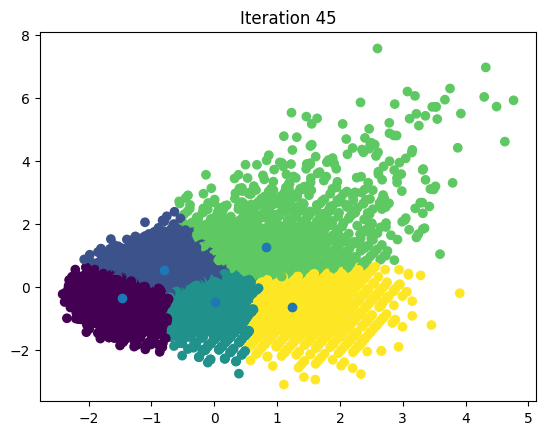

In [18]:
centroids, labels = k_means(dataset)

In [23]:
data[labels == 4][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
199,Pepe,82,82,5500000.0,14000.0,38
284,Joaquín,81,81,8500000.0,23000.0,39
290,S. Mandanda,81,81,2900000.0,24000.0,36
292,José Fonte,81,81,4600000.0,30000.0,37
295,Adán,81,81,4400000.0,14000.0,34
...,...,...,...,...,...,...
18428,Wang Fei,53,53,70000.0,2000.0,32
18430,B. Singh,53,53,45000.0,500.0,34
18658,M. McChrystal,52,52,15000.0,500.0,37
18671,G. Maley,52,52,9000.0,600.0,38
